# 📘 Experimento Interactivo: "Dibuja tu Número y la IA lo Adivina"

## 🔧 Requisitos

```bash
pip install ipywidgets scikit-learn matplotlib
```

Y en Jupyter, activa widgets:

```bash
jupyter nbextension enable --py widgetsnbextension
```


### 🚀 Código


Precisión del modelo en test: 0.975


Output()

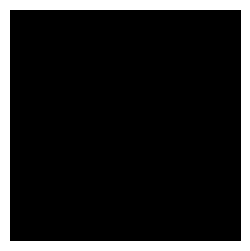

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display, clear_output

# ============================
# 1. Entrenar el modelo
# ============================
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

modelo = LogisticRegression(max_iter=2000)
modelo.fit(X_train, y_train)

print("Precisión del modelo en test:", accuracy_score(y_test, modelo.predict(X_test)))

# ============================
# 2. Crear lienzo interactivo
# ============================

canvas_size = 8  # 8x8 píxeles (igual al dataset)
drawing = np.zeros((canvas_size, canvas_size))

fig, ax = plt.subplots(figsize=(3,3))
img_plot = ax.imshow(drawing, cmap="gray", vmin=0, vmax=16)
ax.axis("off")

# Widget botón para limpiar
button_clear = widgets.Button(description="🧹 Limpiar")
button_predict = widgets.Button(description="🔮 Predecir")

output = widgets.Output()

# Función para actualizar el dibujo cuando se hace clic en la imagen
def onclick(event):
    if event.inaxes == ax:
        x, y = int(event.xdata), int(event.ydata)
        if 0 <= x < canvas_size and 0 <= y < canvas_size:
            drawing[y, x] = 16  # intensidad máxima
            img_plot.set_data(drawing)
            fig.canvas.draw()

# Conectar evento
cid = fig.canvas.mpl_connect("button_press_event", onclick)

# Limpiar lienzo
def clear_canvas(b):
    global drawing
    drawing = np.zeros((canvas_size, canvas_size))
    img_plot.set_data(drawing)
    fig.canvas.draw()
    with output:
        clear_output()

button_clear.on_click(clear_canvas)

# Predecir
def predict_digit(b):
    X = drawing.flatten().reshape(1, -1)
    pred = modelo.predict(X)[0]
    probas = modelo.predict_proba(X)[0]
    with output:
        clear_output()
        print(f"👉 Predicción del modelo: {pred}")
        print("Probabilidades por clase:", np.round(probas, 2))

button_predict.on_click(predict_digit)

# Mostrar interfaz
display(widgets.HBox([button_clear, button_predict]))
display(output)
plt.show()


### 🎮 Cómo funciona

1. El estudiante **dibuja clickeando en los cuadros del lienzo 8x8**.
2. Puede presionar **“Predecir”** y el modelo de regresión logística dirá cuál número cree que es.
3. Si se equivoca, pueden discutir **qué significa en términos de álgebra lineal (espacio de características, distancias, proyecciones, etc.)**.